# Importando Bibliotecas

In [2]:
# importando Bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import math
import csv
import scipy
from scipy import stats
import numpy as np
import seaborn as sns

# ignorando os warnings
import warnings
warnings.filterwarnings("ignore")

# Entendeno a Estrutura da Base

In [3]:
# importando a base de dados
df_caged = pd.read_csv(r'cagedest_012018.csv',sep=";",dtype=None)

In [4]:
#visão basica dos dados
df_caged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2491174 entries, 0 to 2491173
Data columns (total 40 columns):
Admitidos/Desligados     int64
Competência Declarada    int64
Município                int64
Ano Declarado            int64
CBO 2002 Ocupação        int64
CNAE 1.0 Classe          int64
CNAE 2.0 Classe          int64
CNAE 2.0 Subclas         int64
Faixa Empr Início Jan    int64
Grau Instrução           int64
Qtd Hora Contrat         int64
IBGE Subsetor            int64
Idade                    int64
Ind Aprendiz             int64
Ind Portador Defic       int64
Raça Cor                 int64
Salário Mensal           object
Saldo Mov                int64
Sexo                     int64
Tempo Emprego            object
Tipo Estab               int64
Tipo Defic               int64
Tipo Mov Desagregado     int64
UF                       int64
Bairros SP               object
Bairros Fortaleza        object
Bairros RJ               object
Distritos SP             object
Regiões Adm D

In [5]:
# renomeando as colunas
df_caged.columns = ['admitidos_desligados',
                    'competencia',
                    'municipio',
                    'ano_declarado',
                    'CBO_2002_ocupacao',
                    'CNAE_um_class',
                    'CNAE_dois_class',
                    'CNAE_dois_subclass',
                    'company_size_jan',
                    'instrucao',
                    'Qtd_Hora_Contrat',
                    'IBGE_Subsetor',
                    'idade',
                    'aprendiz_b',
                    'portador_defic_b',
                    'etnia',
                    'salario_mensal',
                    'saldo_movimento',
                    'genero',
                    'tempo_emprego',
                    'tipo_estabilidade',
                    'tipo_deficiencia',
                    'tipo_de_movimento',
                    'UF',
                    'bairros_SP',
                    'bairros_Fort',
                    'bairros_RJ',
                    'distritos_SP',
                    'regioes_DF',
                    'Mesorregiao',
                    'Microrregiao',
                    'regiao_RJ',
                    'regiao_SP',
                    'regiao_corede',
                    'regiao_Corede_quatro',
                    'regiao_gov_SP',
                    'regiao_senac_PR',
                    'regiao_senai_PR',
                    'regiao_senai_SP',
                    'sub_regiao_senai_PR']

In [6]:
#Retirando as colunas superfulas do DF
df_caged = df_caged.drop(['tipo_de_movimento','bairros_SP','bairros_Fort','bairros_RJ','distritos_SP',
                        'regioes_DF',
                        'Mesorregiao',
                        'Microrregiao',
                        'regiao_RJ',
                        'regiao_SP',
                        'regiao_corede',
                        'regiao_Corede_quatro',
                        'regiao_gov_SP',
                        'regiao_senac_PR',
                        'regiao_senai_PR',
                        'regiao_senai_SP',
                        'sub_regiao_senai_PR',
                        'admitidos_desligados',
                        'competencia',
                        'municipio',
                        'ano_declarado',
                        'CBO_2002_ocupacao',
                        'CNAE_um_class',
                        'CNAE_dois_class',
                        'CNAE_dois_subclass',
                        'Qtd_Hora_Contrat',
                        'IBGE_Subsetor',
                        'saldo_movimento',
                        'tipo_estabilidade'], axis=1)

In [7]:
# Nova verificação do DF
df_caged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2491174 entries, 0 to 2491173
Data columns (total 11 columns):
company_size_jan    int64
instrucao           int64
idade               int64
aprendiz_b          int64
portador_defic_b    int64
etnia               int64
salario_mensal      object
genero              int64
tempo_emprego       object
tipo_deficiencia    int64
UF                  int64
dtypes: int64(9), object(2)
memory usage: 209.1+ MB


In [8]:
#Mudança de , para . para transformação de tipo do Salario mensal e tempo no emprego
df_caged['salario_mensal'] = df_caged['salario_mensal'].apply(lambda x: x.replace(",","."))
df_caged['salario_mensal'] = df_caged['salario_mensal'].astype(float)

df_caged['tempo_emprego'] = df_caged['tempo_emprego'].apply(lambda x: x.replace(",","."))
df_caged['tempo_emprego'] = df_caged['tempo_emprego'].astype(float)

In [9]:
# Nova verificação dos valores
df_caged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2491174 entries, 0 to 2491173
Data columns (total 11 columns):
company_size_jan    int64
instrucao           int64
idade               int64
aprendiz_b          int64
portador_defic_b    int64
etnia               int64
salario_mensal      float64
genero              int64
tempo_emprego       float64
tipo_deficiencia    int64
UF                  int64
dtypes: float64(2), int64(9)
memory usage: 209.1 MB


In [10]:
#entendendo as colunas
df_caged.head()

,company_size_jan,instrucao,idade,aprendiz_b,portador_defic_b,etnia,salario_mensal,genero,tempo_emprego,tipo_deficiencia,UF
0,2,8,23,0,0,2,520.0,2,5.0,0,11
1,1,7,20,0,0,9,954.0,1,7.0,0,11
2,1,2,38,0,0,9,1085.0,1,0.0,0,11
3,1,7,26,0,0,9,1085.0,1,0.0,0,11
4,1,7,24,0,0,9,1085.0,1,0.0,0,11


# Ajustando os valores das Variaveis Categóricas

In [120]:
#Importando df com as legendas de cada uma das variáveis categoricas
df_company_size_leg = pd.read_csv(r'company_size.csv',sep=",",dtype=None)
df_instrucao_leg = pd.read_csv(r'instrucao.csv',sep=",",dtype=None)
df_aprendiz_leg = pd.read_csv(r'aprendiz.csv',sep=",",dtype=None)
df_deficiencia_leg = pd.read_csv(r'deficiencia.csv',sep=",",dtype=None)
df_etnia_leg = pd.read_csv(r'etnia.csv',sep=",",dtype=None)
df_genero_leg = pd.read_csv(r'genero.csv',sep=",",dtype=None)
df_tipo_deficiencia_leg = pd.read_csv(r'tipo_deficiencia.csv',sep=",",dtype=None)
df_uf_leg = pd.read_csv(r'uf.csv',sep=",",dtype=None)

In [122]:
# verificando impotação de uma das legendas
df_instrucao_leg

,Indice,instrucao
0,1,Analfabeto
1,2,Até 5ª Incompleto
2,3,5ª Completo Fundamental
3,4,6ª a 9ª Fundamental
4,5,Fundamental Completo
5,6,Médio Incompleto
6,7,Médio Completo
7,8,Superior Incompleto
8,9,Superior Completo
9,10,MESTRADO


In [123]:
# Join DF principal com os DF legenda - Teste 1
df_caged_ajustado = df_caged.join(df_instruçao_leg.set_index('Indice'), on='instrucao', how='left', lsuffix='_left', rsuffix='_right')
df_caged_ajustado = df_caged_ajustado.drop('instrucao_left', axis = 1)

df_caged_ajustado.head()

,company_size_jan,idade,aprendiz_b,portador_defic_b,etnia,salario_mensal,genero,tempo_emprego,tipo_deficiencia,UF,instrucao_right
0,2,23,0,0,2,520.0,2,5.0,0,11,Superior Incompleto
1,1,20,0,0,9,954.0,1,7.0,0,11,Médio Completo
2,1,38,0,0,9,1085.0,1,0.0,0,11,Até 5ª Incompleto
3,1,26,0,0,9,1085.0,1,0.0,0,11,Médio Completo
4,1,24,0,0,9,1085.0,1,0.0,0,11,Médio Completo


In [124]:
#company_size
df_caged_ajustado = df_caged_ajustado.join(df_company_size_leg.set_index('indice'), on='company_size_jan', how='left', lsuffix='_left', rsuffix='_right')
df_caged_ajustado = df_caged_ajustado.drop('company_size_jan', axis = 1)

#aprendiz
df_caged_ajustado = df_caged_ajustado.join(df_aprendiz_leg.set_index('indice'), on='aprendiz_b', how='left', lsuffix='_left', rsuffix='_right')
df_caged_ajustado = df_caged_ajustado.drop('aprendiz_b', axis = 1)

#deficiencia
df_caged_ajustado = df_caged_ajustado.join(df_deficiencia_leg.set_index('indice'), on='portador_defic_b', how='left', lsuffix='_left', rsuffix='_right')
df_caged_ajustado = df_caged_ajustado.drop('portador_defic_b', axis = 1)

#etnia
df_caged_ajustado = df_caged_ajustado.join(df_etnia_leg.set_index('indice'), on='etnia', how='left', lsuffix='_left', rsuffix='_right')
df_caged_ajustado = df_caged_ajustado.drop('etnia_left', axis = 1)

#genero
df_caged_ajustado = df_caged_ajustado.join(df_genero_leg.set_index('indice'), on='genero', how='left', lsuffix='_left', rsuffix='_right')
df_caged_ajustado = df_caged_ajustado.drop('genero_left', axis = 1)

#tipo_deficiencia
df_caged_ajustado = df_caged_ajustado.join(df_tipo_deficiencia_leg.set_index('Indice'), on='tipo_deficiencia', how='left', lsuffix='_left', rsuffix='_right')
df_caged_ajustado = df_caged_ajustado.drop('tipo_deficiencia_left', axis = 1)

#UF
df_caged_ajustado = df_caged_ajustado.join(df_uf_leg.set_index('Indice'), on='UF', how='left', lsuffix='_left', rsuffix='_right')
df_caged_ajustado = df_caged_ajustado.drop('UF_left', axis = 1)

df_caged_ajustado.head()

,idade,salario_mensal,tempo_emprego,instrucao_right,company_size,aprendiz,deficiencia,etnia_right,genero_right,tipo_deficiencia_right,UF_right
0,23,520.0,5.0,Superior Incompleto,DE 5 A 9,NAO,NAO,BRANCA,FEMININO,NAO DEFIC,Rondônia
1,20,954.0,7.0,Médio Completo,ATE 4,NAO,NAO,NAO IDENT,MASCULINO,NAO DEFIC,Rondônia
2,38,1085.0,0.0,Até 5ª Incompleto,ATE 4,NAO,NAO,NAO IDENT,MASCULINO,NAO DEFIC,Rondônia
3,26,1085.0,0.0,Médio Completo,ATE 4,NAO,NAO,NAO IDENT,MASCULINO,NAO DEFIC,Rondônia
4,24,1085.0,0.0,Médio Completo,ATE 4,NAO,NAO,NAO IDENT,MASCULINO,NAO DEFIC,Rondônia


In [33]:
# Nova verificação dos valores
df_caged_ajustado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2491174 entries, 0 to 2491173
Data columns (total 11 columns):
idade                     int64
salario_mensal            float64
tempo_emprego             float64
instrucao_right           object
company_size              object
aprendiz                  object
deficiencia               object
etnia_right               object
genero_right              object
tipo_deficiencia_right    object
UF_right                  object
dtypes: float64(2), int64(1), object(8)
memory usage: 209.1+ MB


In [34]:
#verificando para perda de linhas
a = len(df_caged) == len(df_caged_ajustado)

print (a)

df_caged_ajustado.shape

True


(2491174, 11)

In [35]:
df_caged_ajustado.describe().round(2)

,idade,salario_mensal,tempo_emprego
count,2491174.00,2491174.00,2491174.00
mean,31.99,1571.74,11.07
std,10.73,1861.68,30.05
min,10.00,0.00,0.00
25%,23.00,1046.00,0.00
50%,30.00,1241.00,0.00
75%,38.00,1550.00,9.00
max,99.00,143100.00,595.00


# Entendendo os Valores de Cada variável

In [36]:
df_caged_ajustado.salario_mensal.value_counts(ascending=False).head(10)

954.0     122534
1200.0     33768
1500.0     31057
1100.0     25989
1000.0     24901
1150.0     22737
1300.0     20841
0.0        19913
937.0      19624
2000.0     16403
Name: salario_mensal, dtype: int64

In [37]:
df_caged_ajustado.corr()

,idade,salario_mensal,tempo_emprego
idade,1.000000,0.138590,0.237671
salario_mensal,0.138590,1.000000,0.160804
tempo_emprego,0.237671,0.160804,1.000000


In [38]:
def plotcolum(a,b):
    plt.figure(figsize=(10,5))
    sns.countplot(y = a, data = b, order = a.value_counts().index)
    plt.show()

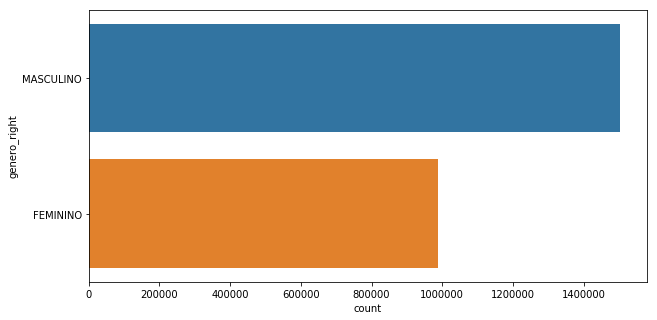

In [39]:
plotcolum(df_caged_ajustado['genero_right'],df_caged_ajustado)

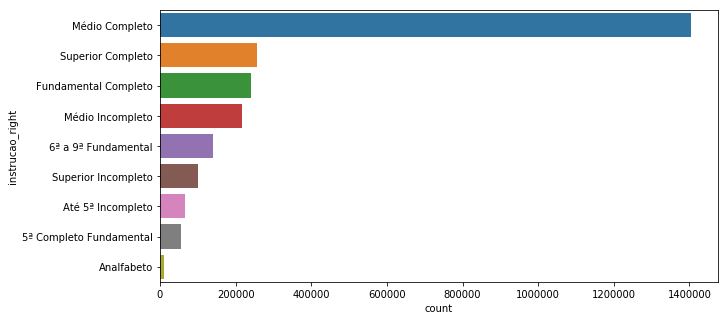

In [21]:
plotcolum(df_caged_ajustado['instrucao_right'],df_caged_ajustado)

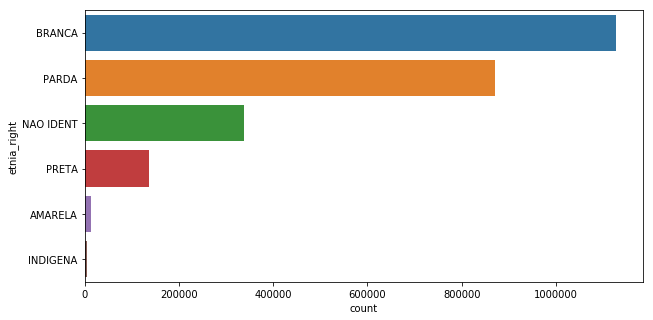

In [22]:
plotcolum(df_caged_ajustado['etnia_right'],df_caged_ajustado)

## Analise extensiva Sobre Salario

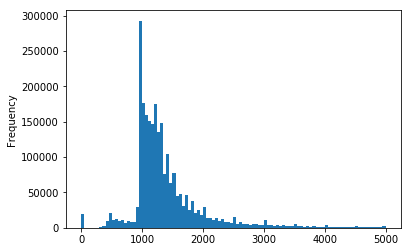

In [23]:
df_caged_ajustado['salario_mensal'].plot.hist(bins=100, range = (-1, 5000))

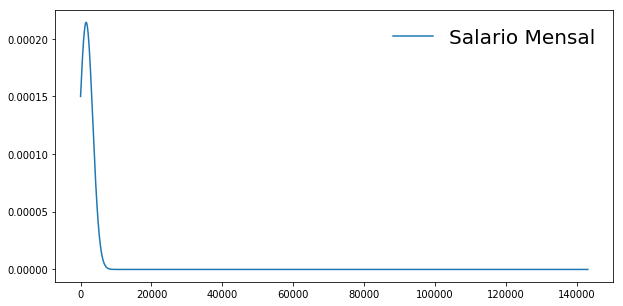

In [24]:
##SALARIO

# definindo os valores de x
xs = df_caged_ajustado.salario_mensal.sort_values()
# calculando a média
mus = df_caged_ajustado.salario_mensal.mean()
# calculando o desvio padrão populacional
sigmas = df_caged_ajustado.salario_mensal.std()

mus,sigmas

# criando uma figura com um gráfico 
fig, ax = plt.subplots(1, 1,figsize=(10,5))
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax.plot(xs, stats.norm.pdf(x=xs, loc=mus, scale=sigmas),label='Salario Mensal')
# imprimindo a legenda
ax.legend(loc='best', frameon=False,fontsize = 20)
# mostrando o gráfico
plt.show()

In [43]:
# criando um df somente com os valores 0 de salario mensal
df_salarios_zerados = df_caged_ajustado[df_caged_ajustado.salario_mensal == 0]

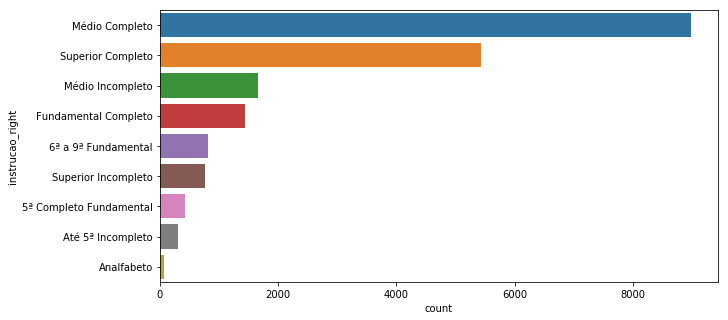

In [44]:
plotcolum(df_salarios_zerados['instrucao_right'],df_salarios_zerados)

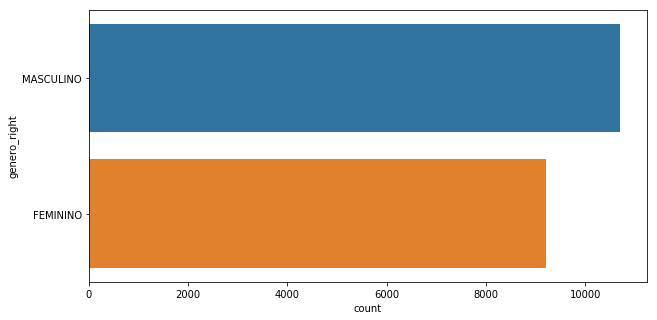

In [45]:
plotcolum(df_salarios_zerados['genero_right'],df_salarios_zerados)

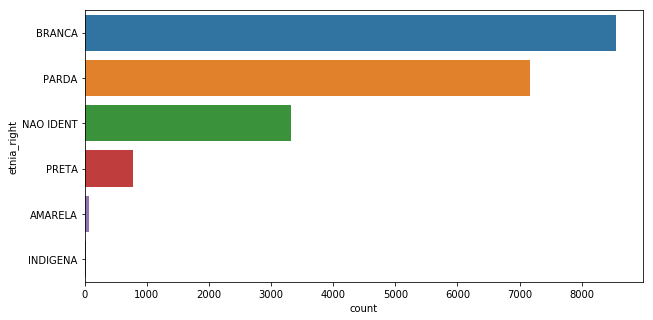

In [28]:
plotcolum(df_salarios_zerados['etnia_right'],df_salarios_zerados)

In [46]:
df_minimo = df_caged_ajustado[df_caged_ajustado.salario_mensal != 0]

In [47]:
df_minimo.describe().round(2)

,idade,salario_mensal,tempo_emprego
count,2471261.00,2471261.00,2471261.00
mean,31.99,1584.40,11.08
std,10.73,1863.79,30.05
min,10.00,287.00,0.00
25%,23.00,1050.00,0.00
50%,30.00,1245.00,0.00
75%,38.00,1557.00,9.00
max,99.00,143100.00,595.00


In [48]:
df_caged_ajustado.describe().round(2)

,idade,salario_mensal,tempo_emprego
count,2491174.00,2491174.00,2491174.00
mean,31.99,1571.74,11.07
std,10.73,1861.68,30.05
min,10.00,0.00,0.00
25%,23.00,1046.00,0.00
50%,30.00,1241.00,0.00
75%,38.00,1550.00,9.00
max,99.00,143100.00,595.00


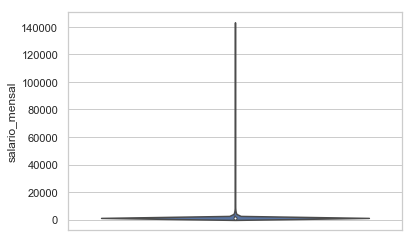

In [49]:
sns.set(style="whitegrid")
tips = df_caged_ajustado
ax = sns.violinplot(y=tips["salario_mensal"])

In [50]:
df_semzeros_semoutliers = df_minimo

b = round(((len(df_semzeros_semoutliers)/len(df_caged_ajustado))-1)*100,2)

print("A nova base possui %s%s dados a menos que a original" % (b,'%'))

A nova base possui -0.8% dados a menos que a original


In [51]:
df_outliers = df_caged_ajustado[df_caged_ajustado.salario_mensal > 5000]
df_outliers.shape

(51850, 11)

In [52]:
df_semzeros_semoutliers.describe().round(2)

,idade,salario_mensal,tempo_emprego
count,2471261.00,2471261.00,2471261.00
mean,31.99,1584.40,11.08
std,10.73,1863.79,30.05
min,10.00,287.00,0.00
25%,23.00,1050.00,0.00
50%,30.00,1245.00,0.00
75%,38.00,1557.00,9.00
max,99.00,143100.00,595.00


In [53]:
df_semzeros_semoutliers.corr()

,idade,salario_mensal,tempo_emprego
idade,1.000000,0.139369,0.237287
salario_mensal,0.139369,1.000000,0.161611
tempo_emprego,0.237287,0.161611,1.000000


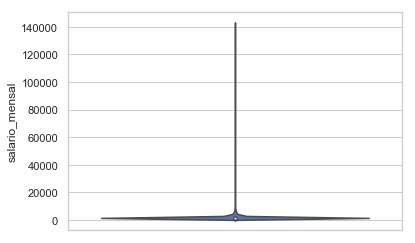

In [54]:
sns.set(style="whitegrid")
tips = df_semzeros_semoutliers
ax = sns.violinplot(y=tips["salario_mensal"])

In [55]:
# fazendo o teste de normalidade de shapiro inicial
stats.shapiro(df_semzeros_semoutliers['salario_mensal'])

(0.27005136013031006, 0.0)

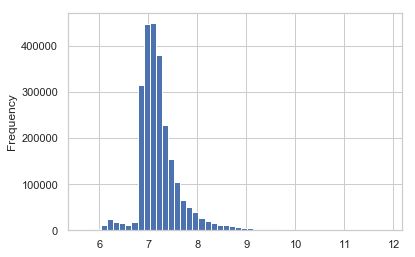

In [56]:
# aplicando o LOG na série de dados de salário e plotando uam distribuição
df_semzeros_semoutliers['log_salary'] = np.log(df_semzeros_semoutliers['salario_mensal'])
df_semzeros_semoutliers['log_salary'].plot.hist(bins=50)

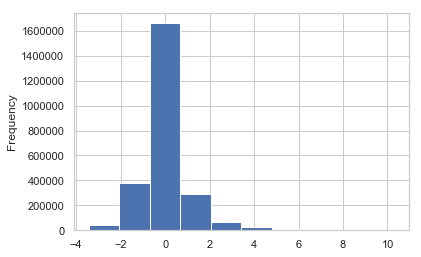

In [57]:
# valor PADRONIZADO significa subtrair a média e dividir pelo desvio padrão
df_semzeros_semoutliers['normal_log_salary'] = ( df_semzeros_semoutliers['log_salary'] -df_semzeros_semoutliers['log_salary'].mean() ) / df_semzeros_semoutliers['log_salary'].std()
df_semzeros_semoutliers['normal_log_salary'].plot.hist(bins=10)

In [58]:
# verificando os dados
df_semzeros_semoutliers.head()

,idade,salario_mensal,tempo_emprego,instrucao_right,company_size,aprendiz,deficiencia,etnia_right,genero_right,tipo_deficiencia_right,UF_right,log_salary,normal_log_salary
0,23,520.0,5.0,Superior Incompleto,DE 5 A 9,NAO,NAO,BRANCA,FEMININO,NAO DEFIC,Rondônia,6.253829,-2.117493
1,20,954.0,7.0,Médio Completo,ATE 4,NAO,NAO,NAO IDENT,MASCULINO,NAO DEFIC,Rondônia,6.860664,-0.780237
2,38,1085.0,0.0,Até 5ª Incompleto,ATE 4,NAO,NAO,NAO IDENT,MASCULINO,NAO DEFIC,Rondônia,6.989335,-0.496689
3,26,1085.0,0.0,Médio Completo,ATE 4,NAO,NAO,NAO IDENT,MASCULINO,NAO DEFIC,Rondônia,6.989335,-0.496689
4,24,1085.0,0.0,Médio Completo,ATE 4,NAO,NAO,NAO IDENT,MASCULINO,NAO DEFIC,Rondônia,6.989335,-0.496689


In [59]:
# fazendo o teste de normalidade de shapiro
import scipy.stats
resultado_normal = stats.shapiro(df_semzeros_semoutliers['normal_log_salary'])
resultado_normal

(0.8493508100509644, 0.0)

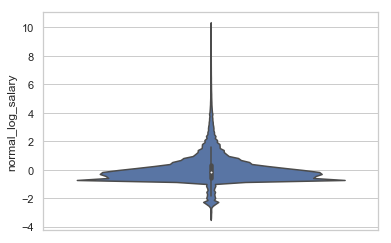

In [60]:
sns.set(style="whitegrid")
tips = df_semzeros_semoutliers
ax = sns.violinplot(y=tips['normal_log_salary'])

In [1]:
sns.set(style="whitegrid")
tips = df_semzeros_semoutliers
ax = ax = sns.violinplot( y="normal_log_salary", hue="genero_right",
                    data=tips, palette="muted", split=True)

NameError: name 'sns' is not defined

In [62]:
# Função para plotar um gráfico de dispersão

def grafico_dispercao (a,b):
    x1 = a
    x2 = b
    plt.scatter(x=a,y=b)
    return plt.show()

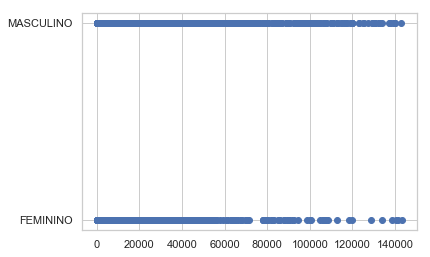

In [63]:
grafico_dispercao (df_semzeros_semoutliers['salario_mensal'],df_semzeros_semoutliers['genero_right'])

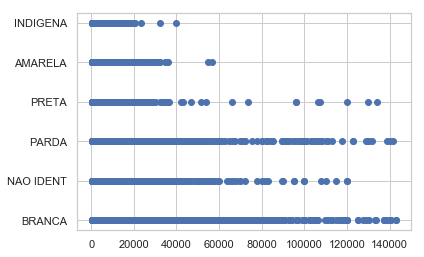

In [64]:
grafico_dispercao (df_semzeros_semoutliers['salario_mensal'],df_semzeros_semoutliers['etnia_right'])

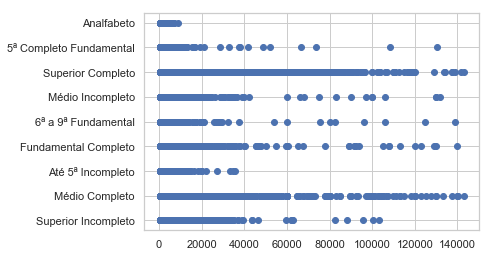

In [65]:
grafico_dispercao (df_semzeros_semoutliers['salario_mensal'],df_semzeros_semoutliers['instrucao_right'])

## Analise extensiva Idade

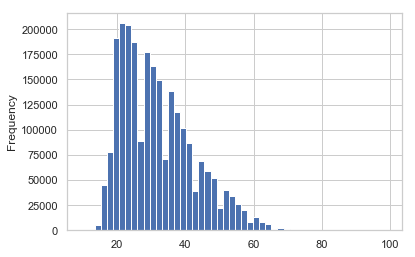

In [47]:
df_semzeros_semoutliers['idade'].plot.hist(bins=50)

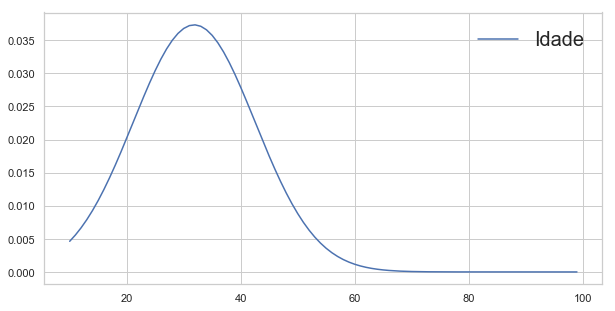

In [45]:
##IDADE

# definindo os valores de x
xs = df_semzeros_semoutliers.idade.sort_values()
# calculando a média
mus = df_semzeros_semoutliers.idade.mean()
# calculando o desvio padrão populacional
sigmas = df_semzeros_semoutliers.idade.std()

mus,sigmas

# criando uma figura com um gráfico 
fig, ax = plt.subplots(1, 1,figsize=(10,5))
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax.plot(xs, stats.norm.pdf(x=xs, loc=mus, scale=sigmas),label='Idade')
# imprimindo a legenda
ax.legend(loc='best', frameon=False,fontsize = 20)
# mostrando o gráfico
plt.show()

In [46]:
# fazendo o teste de normalidade de shapiro
import scipy.stats
resultado_normal = stats.shapiro(df_semzeros_semoutliers['idade'])
resultado_normal

(0.9439114928245544, 0.0)

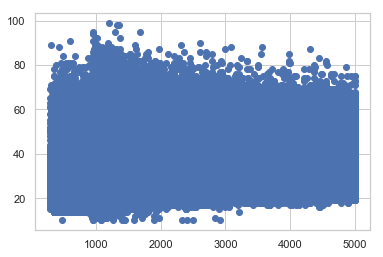

In [55]:
grafico_dispercao (df_semzeros_semoutliers['salario_mensal'],df_semzeros_semoutliers['idade'])

## Relacionamentos entre Idade e Salario

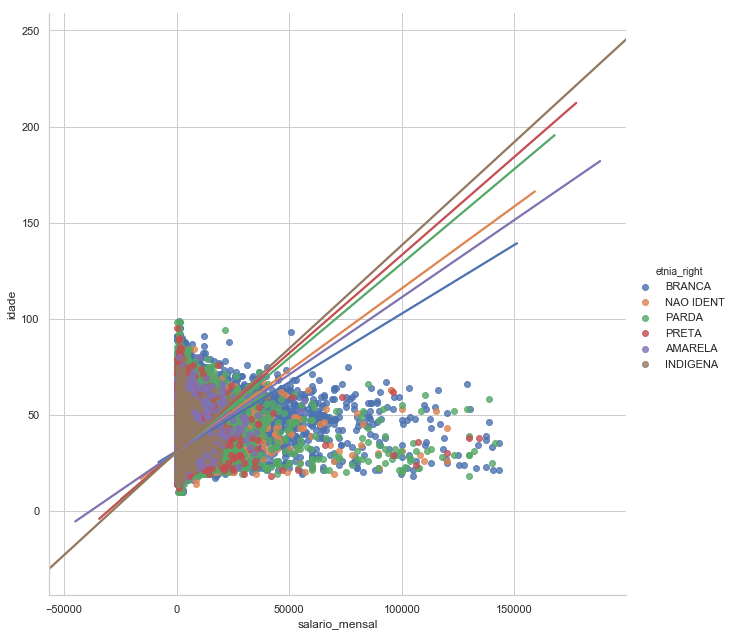

In [555]:
# Implot com quebra por ETNIA
ax = sns.lmplot(x="salario_mensal", y="idade", data=df_caged_ajustado, hue = 'etnia_right', ci= False, height=9)

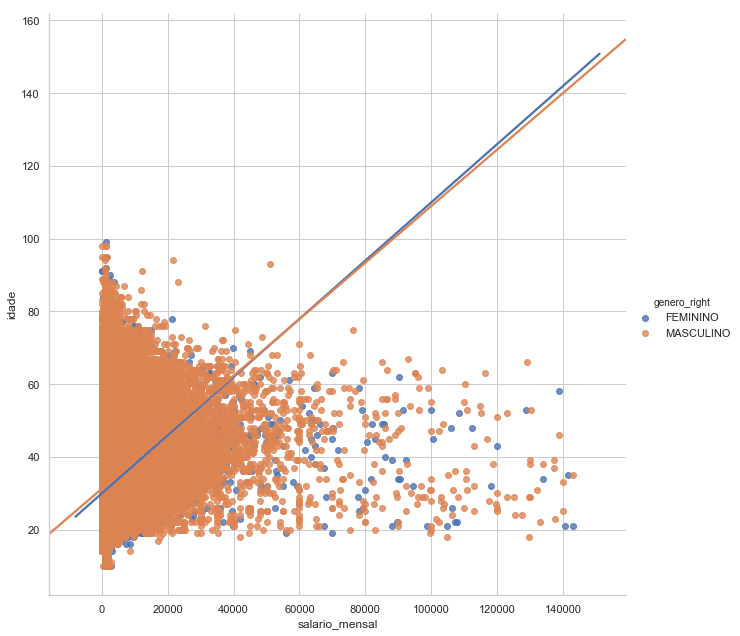

In [556]:
# Implot com quebra por GENERO
ax = sns.lmplot(x="salario_mensal", y="idade", data=df_caged_ajustado, hue = 'genero_right', ci= False, height=9)

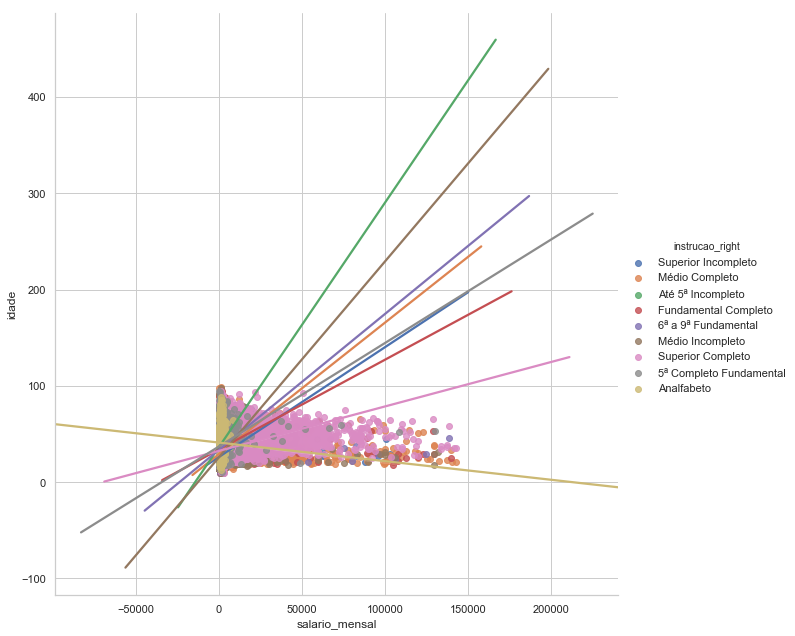

In [557]:
# Implot com quebra por INSTRUCAO
ax = sns.lmplot(x="salario_mensal", y="idade", data=df_caged_ajustado, hue = 'instrucao_right', ci= False, height=9)

## Criando Variavel Relacional entre Etnia e Genero

In [72]:
df_semzeros_semoutliers['categoria_geral'] = df_semzeros_semoutliers[['etnia_right','genero_right']].agg('-'.join, axis=1)

In [73]:
df_semzeros_semoutliers.head()

,idade,salario_mensal,tempo_emprego,instrucao_right,company_size,aprendiz,deficiencia,etnia_right,genero_right,tipo_deficiencia_right,UF_right,log_salary,normal_log_salary,categoria_geral
0,23,520.0,5.0,Superior Incompleto,DE 5 A 9,NAO,NAO,BRANCA,FEMININO,NAO DEFIC,Rondônia,6.253829,-2.117493,BRANCA-FEMININO
1,20,954.0,7.0,Médio Completo,ATE 4,NAO,NAO,NAO IDENT,MASCULINO,NAO DEFIC,Rondônia,6.860664,-0.780237,NAO IDENT-MASCULINO
2,38,1085.0,0.0,Até 5ª Incompleto,ATE 4,NAO,NAO,NAO IDENT,MASCULINO,NAO DEFIC,Rondônia,6.989335,-0.496689,NAO IDENT-MASCULINO
3,26,1085.0,0.0,Médio Completo,ATE 4,NAO,NAO,NAO IDENT,MASCULINO,NAO DEFIC,Rondônia,6.989335,-0.496689,NAO IDENT-MASCULINO
4,24,1085.0,0.0,Médio Completo,ATE 4,NAO,NAO,NAO IDENT,MASCULINO,NAO DEFIC,Rondônia,6.989335,-0.496689,NAO IDENT-MASCULINO


In [74]:
df_semzeros_semoutliers['categoria_geral'].value_counts()

BRANCA-MASCULINO       635084
PARDA-MASCULINO        547377
BRANCA-FEMININO        484210
PARDA-FEMININO         315573
NAO IDENT-MASCULINO    207925
NAO IDENT-FEMININO     126473
PRETA-MASCULINO         90687
PRETA-FEMININO          45924
AMARELA-MASCULINO        7004
AMARELA-FEMININO         5226
INDIGENA-MASCULINO       4302
INDIGENA-FEMININO        1476
Name: categoria_geral, dtype: int64

# Z-score

In [66]:
def p_value_categorgy_analysis (df, coluna, b, n):
    
    c = df
    
    d = n
    
    def sampling(df, n):
        index = np.random.choice(range(0,len(df)), size = n)
        df_s = np.array(df.iloc[index,])
        df_s = pd.DataFrame(df_s)
        df_s.columns = df.columns
        return (df_s)

    df = sampling(c, d)
    
    x = df.normal_log_salary
    # calculando a média
    mu = np.mean(x)
    # calculando o desvio-padrão populacional
    std = np.std(x)
    #Imprimindo a média e o desvio-padrão
    mu,std

    Z_score_inf = scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[0]
    Z_score_sup = scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[1]

    calculos = []
    pvalues_calculados = []
    statistics_calculadas = []
    coluna = df.loc[:,coluna]
    tipo = b
    
    for i in coluna.unique():
        categoria_tstats = stats.ttest_ind(a=x[coluna == tipo],
                                           b=x[coluna == i ], 
                                           equal_var = False)
        

        calculos.append(i)
        pvalues_calculados.append(categoria_tstats[1].round(2))
        statistics_calculadas.append(categoria_tstats[0].round(2))

    # colocando os valores em um DataFrame e listando
    inferencia = pd.DataFrame(list(zip(calculos,pvalues_calculados,statistics_calculadas)),columns=['categoria', 'pvalues','statistics'])
    return inferencia.sort_values(by = "pvalues", ascending = False)

In [67]:
p_value_categorgy_analysis (df_semzeros_semoutliers, 'genero_right' ,'MASCULINO',1000)

,categoria,pvalues,statistics
0,MASCULINO,1.0,0.00
1,FEMININO,0.0,4.68


   categoria  pvalues  statistics
0     BRANCA     1.00        0.00
4    AMARELA     0.84       -0.21
3      PRETA     0.01        2.66
5   INDIGENA     0.01        8.25
1      PARDA     0.00        3.30
2  NAO IDENT     0.00        3.39


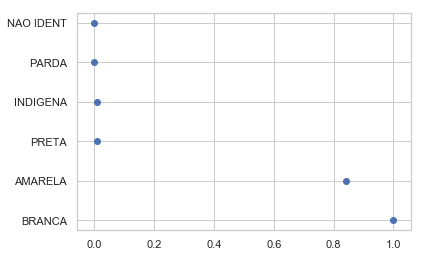

In [68]:
c = pd.DataFrame(p_value_categorgy_analysis (df_semzeros_semoutliers,'etnia_right','BRANCA',1000))

print(c)

grafico_dispercao (c['pvalues'],c['categoria'])

   categoria  pvalues  statistics
1     BRANCA     1.00        0.00
3    AMARELA     0.66       -0.47
5   INDIGENA     0.12        2.54
2  NAO IDENT     0.07        1.82
0      PARDA     0.01        2.59
4      PRETA     0.01        2.90


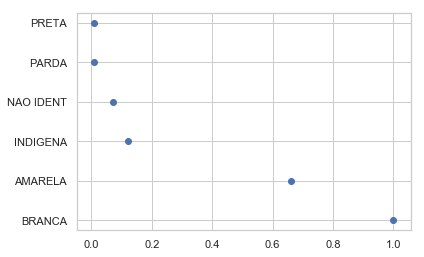

In [69]:
c = df_semzeros_semoutliers[df_semzeros_semoutliers.genero_right == 'FEMININO']

d = pd.DataFrame(p_value_categorgy_analysis (c,'etnia_right','BRANCA',1000))

print(d)

grafico_dispercao (d['pvalues'],d['categoria'])

   categoria  pvalues  statistics
0     BRANCA     1.00        0.00
4    AMARELA     0.78       -0.30
5   INDIGENA     0.58        0.66
2  NAO IDENT     0.03        2.21
1      PARDA     0.00        4.28
3      PRETA     0.00        2.98


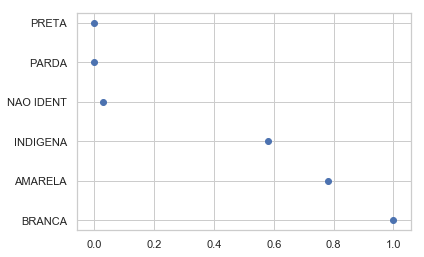

In [101]:
c = df_semzeros_semoutliers[df_semzeros_semoutliers.genero_right == 'MASCULINO']

d = pd.DataFrame(p_value_categorgy_analysis (c,'etnia_right','BRANCA',1000))

print(d)

grafico_dispercao (d['pvalues'],d['categoria'])

In [91]:
data = {'Quartil': ['1o', '2o', '3o', '4o'], 
        'quartis_valores': [1047.00,1237.00,1517.00,5000.00]} 

quartis_valores = pd.DataFrame(data)

p_values_quartis = []
nome_quartis = []

for i in quartis_valores.quartis_valores:
    c = df_semzeros_semoutliers[df_caged_ajustado.salario_mensal < i] 
    df_quartil = pd.DataFrame(p_value_categorgy_analysis (c, 'categoria_geral','BRANCA-MASCULINO',10000))
    print(i, df_quartil)

1047.0               categoria  pvalues  statistics
7      BRANCA-MASCULINO     1.00        0.00
8      AMARELA-FEMININO     0.93       -0.09
10    INDIGENA-FEMININO     0.67       -0.44
5        PRETA-FEMININO     0.58        0.55
0       BRANCA-FEMININO     0.08        1.76
9     AMARELA-MASCULINO     0.06       -1.95
6       PRETA-MASCULINO     0.01       -2.79
1       PARDA-MASCULINO     0.00       -7.59
2    NAO IDENT-FEMININO     0.00       -2.95
3   NAO IDENT-MASCULINO     0.00       -3.60
4        PARDA-FEMININO     0.00       -2.89
11   INDIGENA-MASCULINO     0.00       -3.78
1237.0               categoria  pvalues  statistics
2      BRANCA-MASCULINO     1.00        0.00
10   INDIGENA-MASCULINO     0.71       -0.38
9      AMARELA-FEMININO     0.55        0.60
5       PRETA-MASCULINO     0.45        0.76
4   NAO IDENT-MASCULINO     0.27        1.11
8     AMARELA-MASCULINO     0.13        1.56
11    INDIGENA-FEMININO     0.08        2.14
6    NAO IDENT-FEMININO     0.01        2

In [99]:
data = {'Quartil': ['1o', '2o', '3o', '4o'], 
        'quartis_valores': [23.00, 30.00, 38.00, 99.00]} 

quartis_valores = pd.DataFrame(data)

p_values_quartis = []
nome_quartis = []

for i in quartis_valores.quartis_valores:
    c = df_semzeros_semoutliers[df_caged_ajustado.idade < i] 
    df_quartil = pd.DataFrame(p_value_categorgy_analysis (c, 'categoria_geral','BRANCA-MASCULINO',10000))
    print(i, df_quartil)

23.0               categoria  pvalues  statistics
2      BRANCA-MASCULINO     1.00        0.00
9    INDIGENA-MASCULINO     0.63       -0.50
10    AMARELA-MASCULINO     0.55        0.60
8      AMARELA-FEMININO     0.41        0.84
11    INDIGENA-FEMININO     0.41       -1.04
0        PARDA-FEMININO     0.00       12.88
1       PRETA-MASCULINO     0.00        3.06
3   NAO IDENT-MASCULINO     0.00        4.08
4       PARDA-MASCULINO     0.00        9.92
5       BRANCA-FEMININO     0.00        4.87
6    NAO IDENT-FEMININO     0.00        5.49
7        PRETA-FEMININO     0.00        6.48
30.0               categoria  pvalues  statistics
2      BRANCA-MASCULINO     1.00        0.00
8      AMARELA-FEMININO     0.24        1.22
10   INDIGENA-MASCULINO     0.07        1.95
11    INDIGENA-FEMININO     0.04        2.29
9     AMARELA-MASCULINO     0.03        2.24
0       PARDA-MASCULINO     0.00        8.17
1       BRANCA-FEMININO     0.00        4.17
3       PRETA-MASCULINO     0.00        6.08


In [96]:
data = {'Quartil': ['1o', '2o', '3o', '4o'], 
        'quartis_valores': [23.00, 30.00, 38.00, 99.00]} 

quartis_valores = pd.DataFrame(data)

p_values_quartis = []
nome_quartis = []

for i in quartis_valores.quartis_valores:
    c = df_semzeros_semoutliers[df_caged_ajustado.idade < i] 
    df_quartil = pd.DataFrame(p_value_categorgy_analysis (c, 'genero_right','MASCULINO',1000))
    print(i, df_quartil)

23.0    categoria  pvalues  statistics
1  MASCULINO     1.00        0.00
0   FEMININO     0.45       -0.75
30.0    categoria  pvalues  statistics
1  MASCULINO     1.00        0.00
0   FEMININO     0.05        1.93
38.0    categoria  pvalues  statistics
0  MASCULINO     1.00        0.00
1   FEMININO     0.03        2.16
99.0    categoria  pvalues  statistics
0  MASCULINO      1.0        0.00
1   FEMININO      0.0        3.53


In [111]:
b = df_caged_ajustado.salario_mensal.max()

data = {'Quartil': ['1o', '2o', '3o', '4o'], 
        'quartis_valores': [1047.00,1237.00,1517.00,b]} 

quartis_valores = pd.DataFrame(data)

p_values_quartis = []
nome_quartis = []

for i in quartis_valores.quartis_valores:
    c = df_semzeros_semoutliers[df_caged_ajustado.salario_mensal < i] 
    df_quartil = pd.DataFrame(p_value_categorgy_analysis (c, 'genero_right','MASCULINO',1000))
    print(i, df_quartil)

1047.0    categoria  pvalues  statistics
0  MASCULINO      1.0        0.00
1   FEMININO      0.0        3.11
1237.0    categoria  pvalues  statistics
0  MASCULINO      1.0         0.0
1   FEMININO      1.0        -0.0
1517.0    categoria  pvalues  statistics
1  MASCULINO     1.00        0.00
0   FEMININO     0.02        2.29
143100.0    categoria  pvalues  statistics
0  MASCULINO     1.00        0.00
1   FEMININO     0.01        2.81


In [104]:
data = {'Quartil': df_company_size_leg['indice'], 
        'quartis_valores': df_company_size_leg['company_size']} 

quartis_valores = pd.DataFrame(data)

p_values_quartis = []
nome_quartis = []

for i in quartis_valores.quartis_valores:
    c = df_semzeros_semoutliers[df_caged_ajustado.company_size == i] 
    if len(c) != 0 :
        df_quartil = pd.DataFrame(p_value_categorgy_analysis (c, 'genero_right','MASCULINO',100))
        print(i,df_quartil)
    else :
        print (i, 'não existe')
    

ATE 4    categoria  pvalues  statistics
0  MASCULINO      1.0        0.00
1   FEMININO      0.4        0.84
DE 5 A 9    categoria  pvalues  statistics
0  MASCULINO     1.00        0.00
1   FEMININO     0.04        2.04
DE 10 A 19    categoria  pvalues  statistics
0  MASCULINO     1.00        0.00
1   FEMININO     0.12        1.59
DE 20 A 49    categoria  pvalues  statistics
0  MASCULINO     1.00        0.00
1   FEMININO     0.41       -0.82
DE 50 A 99    categoria  pvalues  statistics
0  MASCULINO     1.00         0.0
1   FEMININO     0.62         0.5
DE 100 A 249    categoria  pvalues  statistics
0  MASCULINO     1.00        0.00
1   FEMININO     0.63        0.49
DE 250 A 499    categoria  pvalues  statistics
0  MASCULINO     1.00        0.00
1   FEMININO     0.22        1.23
DE 500 A 999    categoria  pvalues  statistics
0  MASCULINO     1.00         0.0
1   FEMININO     0.05         2.0
1000 OU MAIS    categoria  pvalues  statistics
0  MASCULINO     1.00        0.00
1   FEMININO    

In [115]:
data = {'Quartil': df_uf_leg['Indice'], 
        'quartis_valores': df_uf_leg['UF']} 

quartis_valores = pd.DataFrame(data)

p_values_quartis = []
nome_quartis = []

for i in quartis_valores.quartis_valores:
    c = df_semzeros_semoutliers[df_caged_ajustado.UF_right == i] 
    if len(c) != 0 :
        df_quartil = pd.DataFrame(p_value_categorgy_analysis (c, 'genero_right','MASCULINO',100))
        print(i,df_quartil)
    else :
        print (i, 'não existe')
    

 Rondônia    categoria  pvalues  statistics
0  MASCULINO      1.0        0.00
1   FEMININO      0.2        1.29
 Acre    categoria  pvalues  statistics
0  MASCULINO     1.00        0.00
1   FEMININO     0.03        2.25
 Amazonas    categoria  pvalues  statistics
1  MASCULINO     1.00        0.00
0   FEMININO     0.97       -0.04
 Roraima    categoria  pvalues  statistics
0  MASCULINO     1.00         0.0
1   FEMININO     0.42         0.8
 Para    categoria  pvalues  statistics
0  MASCULINO     1.00        0.00
1   FEMININO     0.66       -0.45
 Amapa    categoria  pvalues  statistics
0  MASCULINO     1.00        0.00
1   FEMININO     0.01        2.73
 Tocantins    categoria  pvalues  statistics
0  MASCULINO     1.00        0.00
1   FEMININO     0.13        1.54
 Maranhão    categoria  pvalues  statistics
0  MASCULINO     1.00        0.00
1   FEMININO     0.53        0.63
 Piaui    categoria  pvalues  statistics
1  MASCULINO     1.00        0.00
0   FEMININO     0.08        1.79
 Ceará

In [127]:
data = {'Quartil': df_instrucao_leg['Indice'], 
        'quartis_valores': df_instrucao_leg['instrucao']} 

quartis_valores = pd.DataFrame(data)

p_values_quartis = []
nome_quartis = []

for i in quartis_valores.quartis_valores:
    c = df_semzeros_semoutliers[df_caged_ajustado.instrucao_right == i] 
    if len(c) != 0 :
        df_quartil = pd.DataFrame(p_value_categorgy_analysis (c, 'genero_right','MASCULINO',100))
        print(i,df_quartil)
    else :
        print (i, 'não existe')
    

Analfabeto    categoria  pvalues  statistics
0  MASCULINO     1.00        0.00
1   FEMININO     0.56       -0.59
Até 5ª Incompleto    categoria  pvalues  statistics
0  MASCULINO     1.00        0.00
1   FEMININO     0.15        1.44
5ª Completo Fundamental    categoria  pvalues  statistics
0  MASCULINO      1.0        0.00
1   FEMININO      0.0        3.22
6ª a 9ª Fundamental    categoria  pvalues  statistics
0  MASCULINO      1.0        0.00
1   FEMININO      0.0        3.98
Fundamental Completo    categoria  pvalues  statistics
0  MASCULINO      1.0        0.00
1   FEMININO      0.0        4.01
Médio Incompleto    categoria  pvalues  statistics
0  MASCULINO     1.00        0.00
1   FEMININO     0.01        2.83
Médio Completo    categoria  pvalues  statistics
0  MASCULINO     1.00        0.00
1   FEMININO     0.03        2.23
Superior Incompleto    categoria  pvalues  statistics
1  MASCULINO     1.00        0.00
0   FEMININO     0.29        1.06
Superior Completo    categoria  pvalue

# Correlação E Heatmat Total

In [14]:
df_caged_corr = df_caged.drop(['company_size_jan','aprendiz_b','portador_defic_b','tempo_emprego','tipo_deficiencia','UF'],axis = 1)

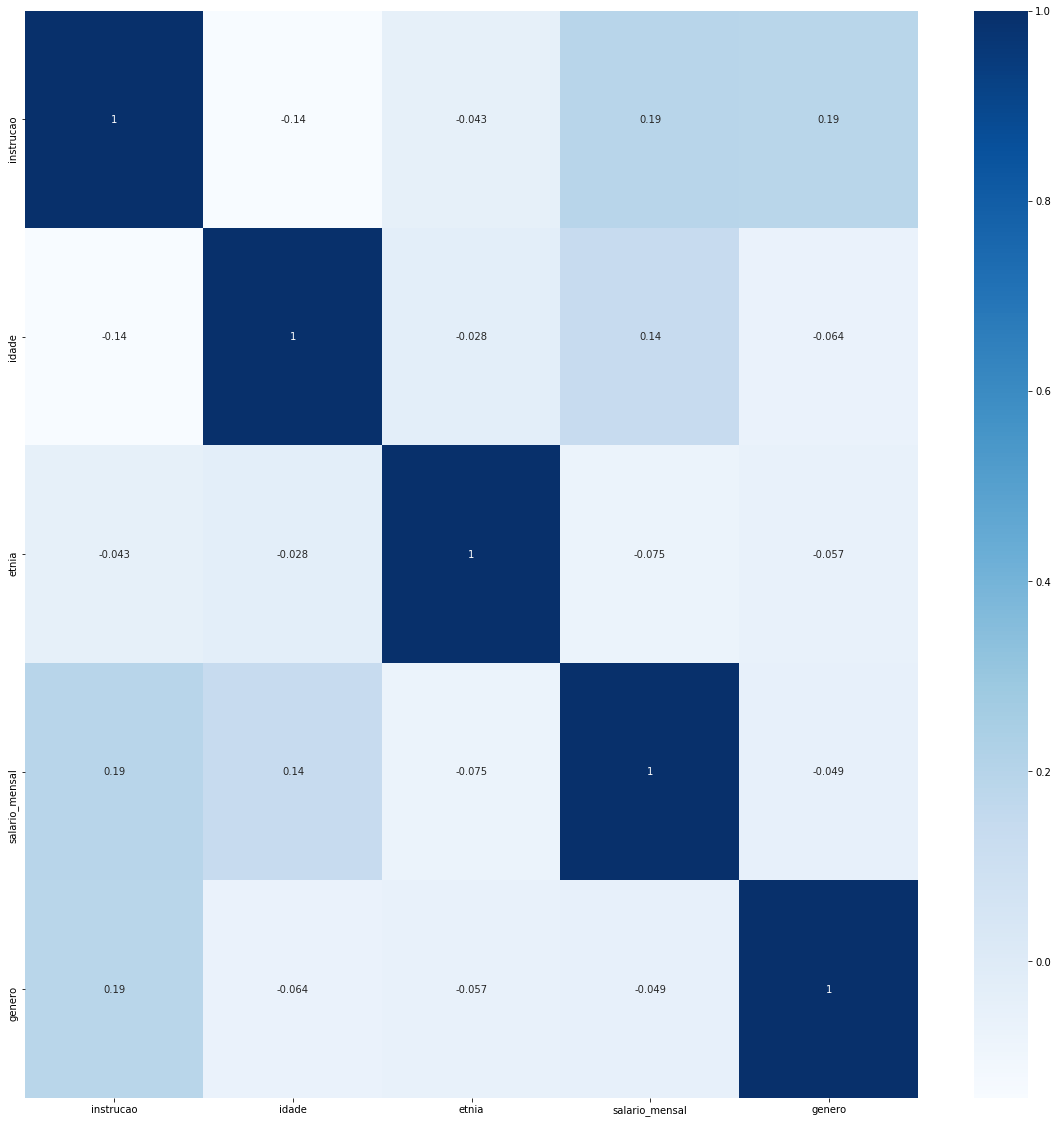

In [15]:
plt.figure(figsize = (20,20))
sns.heatmap(df_caged_corr.corr(), cmap='Blues',annot = True);